In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("movie_cluster_data.csv")  # Update path if needed

df = df.drop_duplicates()

# Preview data
print(df.head())
print(df.info())


   is_Action  is_Comedy  is_Drama  is_Horror  is_Romance  is_Sci-Fi  \
0          0          1         0          0           0          1   
1          0          0         0          1           0          0   
2          0          0         1          0           1          1   
3          1          0         1          0           1          1   
4          1          1         1          1           1          1   

   popularity     runtime  vote_average                            title  \
0   53.261330  126.965298      7.419076        The Broken Day of Justice   
1   37.488864  109.612643      6.209725         The Broken Night of Time   
2   59.240270   91.432315      6.767392          The Hidden City of Time   
3   48.150979  108.588742      6.821698           The Lost Dream of Time   
4   44.772770  120.990331      5.831910  The Glorious Revenge of Secrets   

   cluster  
0        4  
1        2  
2        1  
3        1  
4        3  
<class 'pandas.core.frame.DataFrame'>


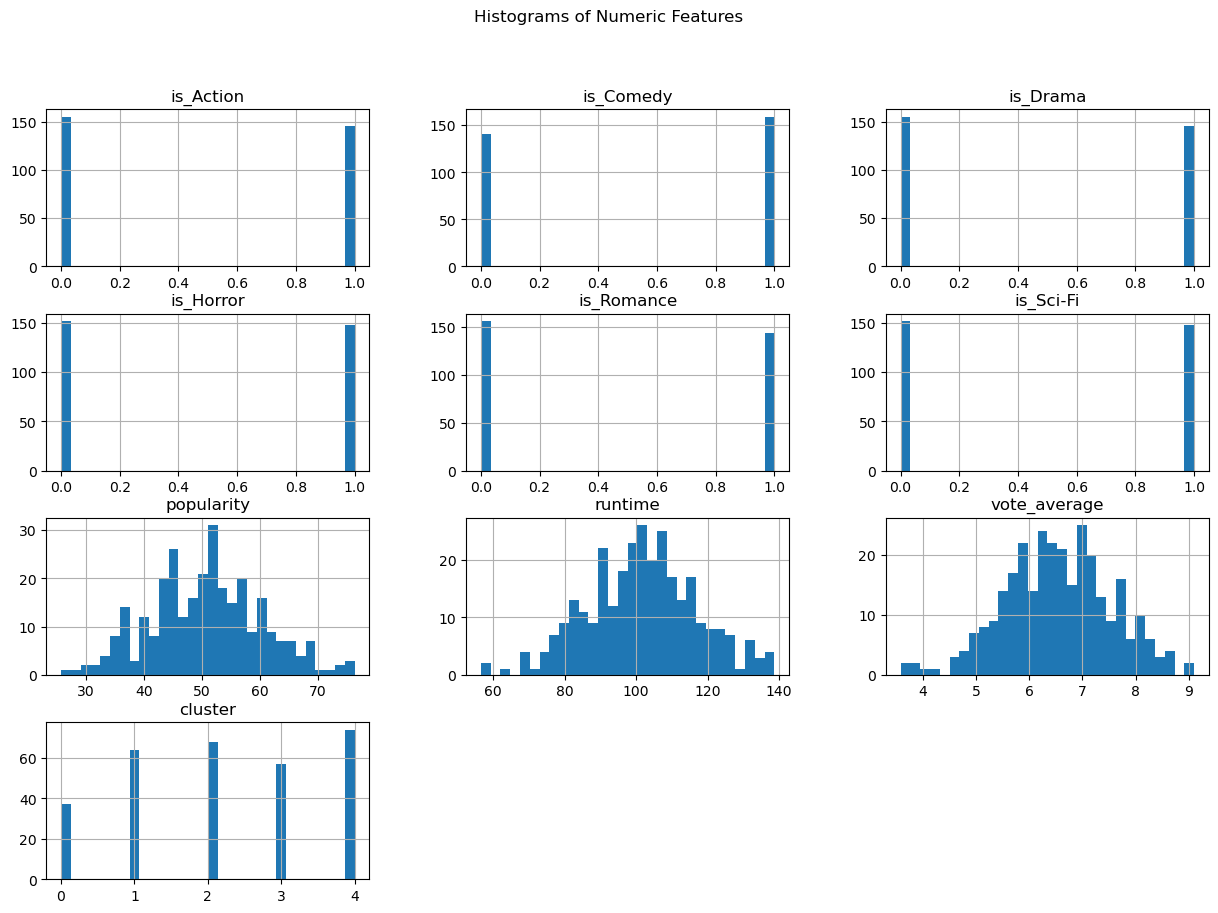

In [7]:
# ...existing code...

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numeric columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Example scatterplots for pairs of features (update feature names as needed)
numeric_cols = df.select_dtypes(include='number').columns


# Pairplot for all numeric columns (optional, can be slow for many columns)
if len(numeric_cols) > 1 and len(numeric_cols) <= 6:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()
# ...existing code...

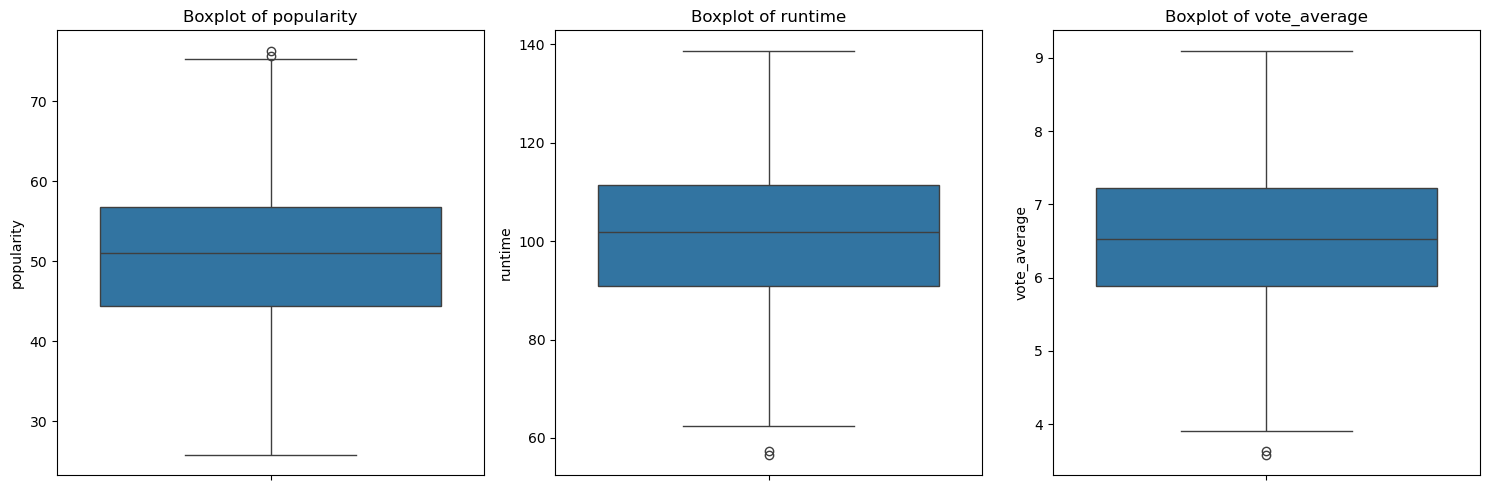

In [8]:
# ...existing code...

# Boxplots for 'popularity', 'runtime', and 'vote_average'
plt.figure(figsize=(15, 5))

for i, col in enumerate(['popularity', 'runtime', 'vote_average']):
    if col in df.columns:
        plt.subplot(1, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# ...existing code...

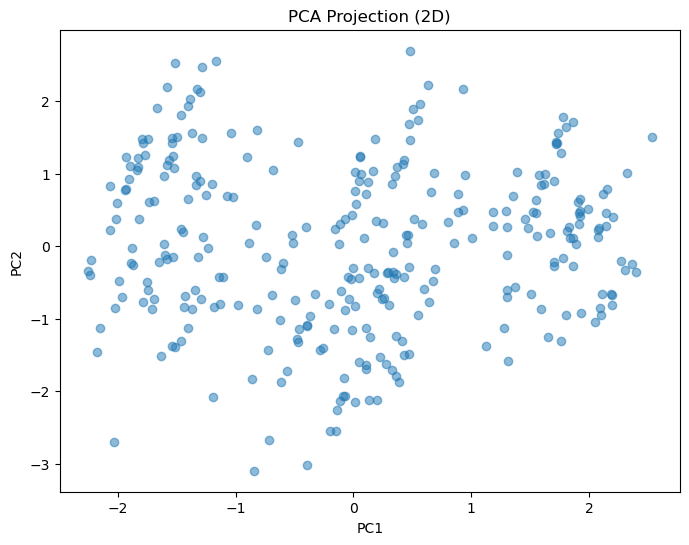

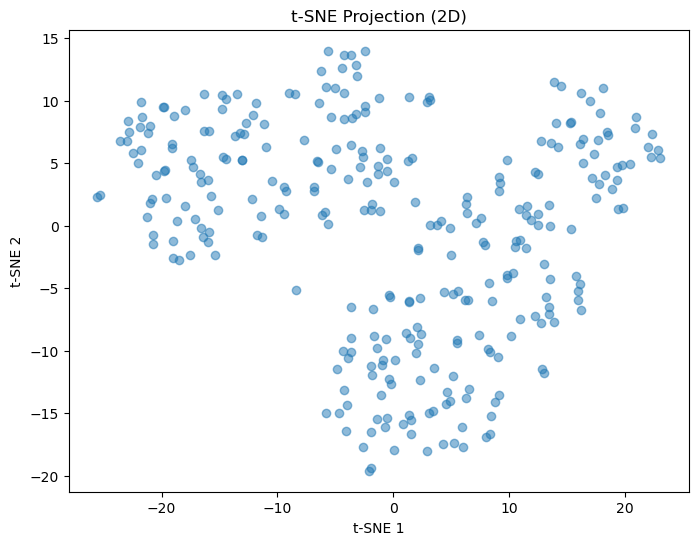

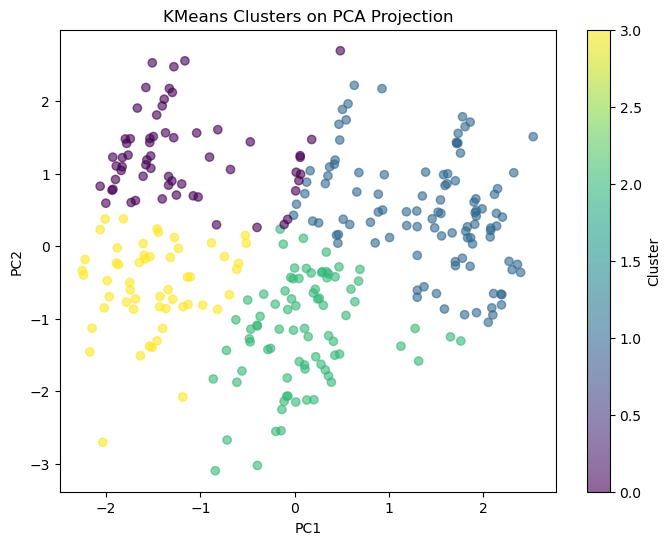

In [9]:
# ...existing code...

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Select numeric columns for clustering
numeric_cols = df.select_dtypes(include='number').columns
X = df[numeric_cols].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("t-SNE Projection (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# KMeans clustering on PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("KMeans Clusters on PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

#

In [10]:
# ...existing code...

# Merge cluster labels back to the original DataFrame (align indices)
df_with_clusters = df.loc[X.index].copy()
df_with_clusters['Cluster'] = X['cluster']

# Function to extract genres as a list
import ast
def extract_genres(genres):
    if pd.isnull(genres):
        return []
    if isinstance(genres, list):
        return genres
    try:
        return ast.literal_eval(genres)
    except Exception:
        return [genres]

# For each cluster, get top 3 genres, avg popularity, and avg vote_average
for cluster in sorted(df_with_clusters['Cluster'].unique()):
    cluster_df = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    # Top 3 genres
    # Sum genre columns for this cluster
    genre_cols = ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 'is_Sci-Fi']
    genre_counts = cluster_df[genre_cols].sum().sort_values(ascending=False)
    top_genres = genre_counts.head(3)
    # Avg popularity and vote_average
    avg_popularity = cluster_df['popularity'].mean()
    avg_vote = cluster_df['vote_average'].mean()
    print(f"\nCluster {cluster}:")
    print("  Top 3 genres:")
    for genre, count in top_genres.items():
        print(f"    {genre}: {count}")
    print(f"  Avg popularity: {avg_popularity:.2f}")
    print(f"  Avg vote_average: {avg_vote:.2f}")

#


Cluster 0:
  Top 3 genres:
    is_Drama: 37
    is_Comedy: 36
    is_Sci-Fi: 29
  Avg popularity: 51.73
  Avg vote_average: 6.65

Cluster 1:
  Top 3 genres:
    is_Drama: 53
    is_Action: 40
    is_Romance: 39
  Avg popularity: 53.15
  Avg vote_average: 6.38

Cluster 2:
  Top 3 genres:
    is_Horror: 41
    is_Action: 33
    is_Sci-Fi: 25
  Avg popularity: 49.98
  Avg vote_average: 6.52

Cluster 3:
  Top 3 genres:
    is_Drama: 55
    is_Romance: 48
    is_Comedy: 47
  Avg popularity: 48.91
  Avg vote_average: 6.66

Cluster 4:
  Top 3 genres:
    is_Comedy: 73
    is_Sci-Fi: 47
    is_Horror: 39
  Avg popularity: 50.30
  Avg vote_average: 6.56


In [ ]:
# ...existing code...

# For each cluster, get top 3 genres (as percentages), avg popularity, and avg vote_average
for cluster in sorted(df_with_clusters['Cluster'].unique()):
    cluster_df = df_with_clusters[df_with_clusters['Cluster'] == cluster]
    # Top 3 genres as percentages
    genre_cols = ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 'is_Sci-Fi']
    genre_counts = cluster_df[genre_cols].sum().sort_values(ascending=False)
    top_genres = genre_counts.head(3)
    total_movies = len(cluster_df)
    # Avg popularity and vote_average
    avg_popularity = cluster_df['popularity'].mean()
    avg_vote = cluster_df['vote_average'].mean()
    print(f"\nCluster {cluster}:")
    print("  Top 3 genres (percentage of cluster):")
    for genre, count in top_genres.items():
        percent = (count / total_movies) * 100 if total_movies > 0 else 0
        print(f"    {genre}: {percent:.1f}%")
    print(f"  Avg popularity: {avg_popularity:.2f}")
    print(f"  Avg vote_average: {avg_vote:.2f}")
    avg_duration = cluster_df['runtime'].mean()
    print(f"  Avg duration (min): {avg_duration:.2f}")
# ...existing code...


Cluster 0:
  Top 3 genres (percentage of cluster):
    is_Drama: 100.0%
    is_Comedy: 97.3%
    is_Sci-Fi: 78.4%
  Avg popularity: 51.73
  Avg vote_average: 6.65
  Avg duration: 105.69

Cluster 1:
  Top 3 genres (percentage of cluster):
    is_Drama: 82.8%
    is_Action: 62.5%
    is_Romance: 60.9%
  Avg popularity: 53.15
  Avg vote_average: 6.38
  Avg duration: 96.59

Cluster 2:
  Top 3 genres (percentage of cluster):
    is_Horror: 60.3%
    is_Action: 48.5%
    is_Sci-Fi: 36.8%
  Avg popularity: 49.98
  Avg vote_average: 6.52
  Avg duration: 100.62

Cluster 3:
  Top 3 genres (percentage of cluster):
    is_Drama: 96.5%
    is_Romance: 84.2%
    is_Comedy: 82.5%
  Avg popularity: 48.91
  Avg vote_average: 6.66
  Avg duration: 104.35

Cluster 4:
  Top 3 genres (percentage of cluster):
    is_Comedy: 98.6%
    is_Sci-Fi: 63.5%
    is_Horror: 52.7%
  Avg popularity: 50.30
  Avg vote_average: 6.56
  Avg duration: 102.78


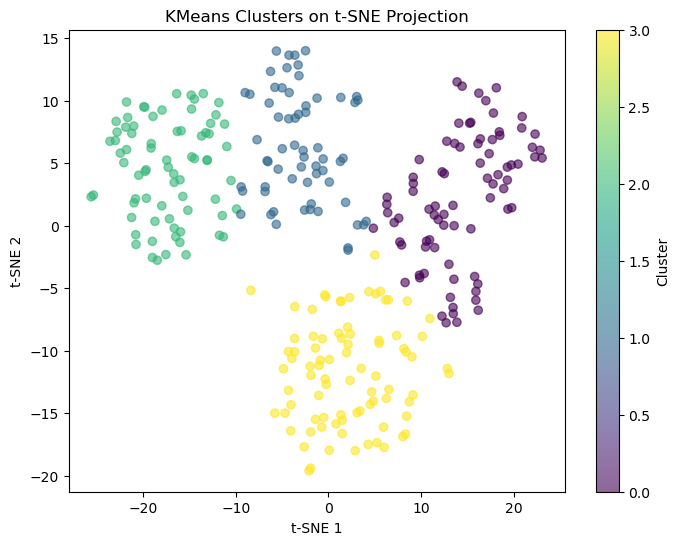

In [18]:
# ...existing code...

# KMeans clustering on t-SNE projection
kmeans_tsne = KMeans(n_clusters=4, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap='viridis', alpha=0.6)
plt.title("KMeans Clusters on t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label='Cluster')
plt.show()

# ...existing

In [20]:
# ...existing code...

# Merge t-SNE KMeans cluster labels back to the original DataFrame (align indices)
df_tsne_clusters = df.loc[X.index].copy()
df_tsne_clusters['Cluster_tsne'] = clusters_tsne

# For each t-SNE cluster, get top 3 genres (as percentages), avg popularity, and avg vote_average
print("Summary statistics for KMeans clustering on t-SNE projection:")
for cluster in sorted(df_tsne_clusters['Cluster_tsne'].unique()):
    cluster_df = df_tsne_clusters[df_tsne_clusters['Cluster_tsne'] == cluster]
    # Top 3 genres as percentages
    genre_cols = ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 'is_Sci-Fi']
    genre_counts = cluster_df[genre_cols].sum().sort_values(ascending=False)
    top_genres = genre_counts.head(3)
    total_movies = len(cluster_df)
    # Avg popularity and vote_average
    avg_popularity = cluster_df['popularity'].mean()
    avg_vote = cluster_df['vote_average'].mean()
    print(f"\nCluster {cluster}:")
    print("  Top 3 genres (percentage of cluster):")
    for genre, count in top_genres.items():
        percent = (count / total_movies) * 100 if total_movies > 0 else 0
        print(f"    {genre}: {percent:.1f}%")
    print(f"  Avg popularity: {avg_popularity:.2f}")
    print(f"  Avg vote_average: {avg_vote:.2f}")
    avg_duration = cluster_df['runtime'].mean()
    print(f"  Avg duration (min): {avg_duration:.2f}")

Summary statistics for KMeans clustering on t-SNE projection:

Cluster 0:
  Top 3 genres (percentage of cluster):
    is_Drama: 100.0%
    is_Sci-Fi: 74.1%
    is_Action: 49.4%
  Avg popularity: 51.38
  Avg vote_average: 6.57
  Avg duration (min): 102.47

Cluster 1:
  Top 3 genres (percentage of cluster):
    is_Drama: 91.9%
    is_Romance: 82.3%
    is_Comedy: 80.6%
  Avg popularity: 48.15
  Avg vote_average: 6.53
  Avg duration (min): 103.84

Cluster 2:
  Top 3 genres (percentage of cluster):
    is_Comedy: 98.6%
    is_Sci-Fi: 65.8%
    is_Horror: 53.4%
  Avg popularity: 50.22
  Avg vote_average: 6.64
  Avg duration (min): 101.07

Cluster 3:
  Top 3 genres (percentage of cluster):
    is_Horror: 56.0%
    is_Action: 52.4%
    is_Romance: 38.1%
  Avg popularity: 52.51
  Avg vote_average: 6.43
  Avg duration (min): 99.66
